In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#!pip install kagglehub

import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("rahmasleam/intel-image-dataset")

#print("Path to dataset files:", path)

In [4]:
import os

def count_folders_and_images(dataset_path):
    total_folders = 6
    total_images = 3000
    for root, dirs, files in os.walk(dataset_path):
        total_folders += len(dirs)  # Count all directories
        total_images += len([file for file in files if file.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))])

    return total_folders, total_images


In [5]:

# Replace `path` with the actual path to your downloaded dataset folder
#dataset_path = r" C:\Users\Asus\.cache\kagglehub\datasets\rahmasleam\intel-image-dataset\versions\1"
dataset_path= r"C:\Users\Asus\intel data set"
num_folders, num_images = count_folders_and_images(dataset_path)

print(f"Number of folders (including subfolders): {num_folders}")
print(f"Number of images: {num_images}")


Number of folders (including subfolders): 13
Number of images: 6000


In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_dir = r"C:\Users\Asus\intel data set" 
output_dir = 'split_dataset'
train_ratio = 0.8  # Fraction of data for training (80%)

# Create output directories for train and test
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each category (subfolder) in the dataset
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

for category in categories:
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)

    # Skip categories with very few images
    if len(images) < 2:
        print(f"Skipping category '{category}' due to insufficient images.")
        continue

    # Split the dataset into train and test
    train_images, test_images = train_test_split(
        images, train_size=train_ratio, random_state=42
    )

    # Create category subfolders in train and test directories
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)

    # Copy images to respective directories
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_category_dir, image))

    for image in test_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(test_category_dir, image))

print(f"Dataset split complete!\nTrain directory: {train_dir}\nTest directory: {test_dir}")


Skipping category '.ipynb_checkpoints' due to insufficient images.
Dataset split complete!
Train directory: split_dataset\train
Test directory: split_dataset\test


In [7]:
#sudo jupyter notebook


#sudo chown $USER:$USER <file_or_directory>



import os
print(os.getcwd())  # Current working directory

file_path = ""



C:\Users\Asus


Random Train Images:
Showing random images from category: sea


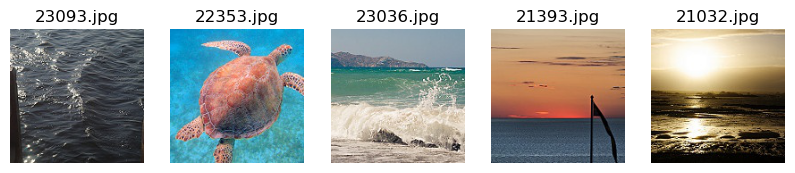

Random Test Images:
Showing random images from category: sea


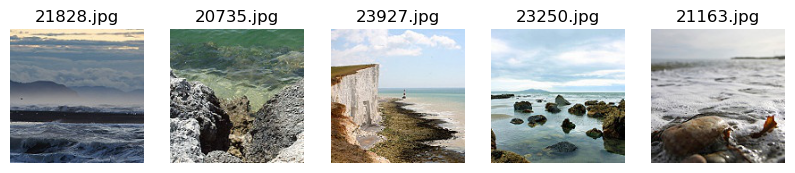

In [8]:
import os
import random
from matplotlib import pyplot as plt
from PIL import Image

directory =  r"C:\Users\Asus\.cache\kagglehub\datasets\rahmasleam\intel-image-dataset\versions\1" 

def show_random_images(directory, num_images=5):
    """
    Display random images from a directory.
    
    Args:
        directory (str): Path to the directory containing category subfolders.
        num_images (int): Number of random images to display.
    """
    # Get all category subfolders
    categories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    if not categories:
        print(f"No categories found in {directory}")
        return

    # Select random category and images
    category = random.choice(categories)
    category_path = os.path.join(directory, category)
    images = os.listdir(category_path)
    if not images:
        print(f"No images found in category {category} of {directory}")
        return

    random_images = random.sample(images, min(len(images), num_images))

    # Display images
    print(f"Showing random images from category: {category}")
    plt.figure(figsize=(10, 5))
    for i, image_name in enumerate(random_images, start=1):
        image_path = os.path.join(category_path, image_name)
        image = Image.open(image_path)
        plt.subplot(1, len(random_images), i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)
    plt.show()

# Display random images from train and test directories
print("Random Train Images:")
show_random_images('split_dataset/train')

print("Random Test Images:")
show_random_images('split_dataset/test')


In [12]:
#!pip install tensorflow

import sys
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score, roc_curve, auc
import seaborn as sns



In [13]:
from tensorflow.keras.applications import VGG16
# Define the model using VGG16
def define_model(num_classes):
    # Load the pre-trained VGG16 model without the top classifier layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Freeze the convolutional base
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)

    # Add custom classification head
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
num_classes = 6  
model = define_model(num_classes)

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,854 (68.39 MB)

 Trainable params: 3,212,166 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
def plot_curves(history):
    # Plot Accuracy Curves
    plt.figure(figsize=(12, 4))

    # Training vs Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training vs Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [23]:
def plot_pr_curve(y_true, y_probs, num_classes):
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_curves(history):
    # Plot Accuracy Curves
    plt.figure(figsize=(12, 4))

    # Training vs Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training vs Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [27]:

def plot_pr_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()


In [29]:

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [31]:
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',  # Multi-class classification
        shuffle=True
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',
        shuffle=False
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)  # Make sure this function is defined elsewhere

    # Train the model
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=40
    )

    # Plot accuracy and loss curves
    plot_curves(history)

    # Evaluate model on test data
    test_steps = len(test_it)
    y_probs = model.predict(test_it, steps=test_steps, verbose=1)
    y_pred = np.argmax(y_probs, axis=1)
    y_true = test_it.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # Plot Confusion Matrix
    class_names = list(test_it.class_indices.keys())
    plot_confusion_matrix(cm, class_names)

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("Classification Report:\n", report)

    # One-hot encode y_true
    y_true_one_hot = np.zeros((len(y_true), num_classes))
    y_true_one_hot[np.arange(len(y_true)), y_true] = 1

    # Precision-Recall Curves
    plot_pr_curve(y_true_one_hot, y_probs, num_classes)

    # Save Confusion Matrix to CSV
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    cm_df.to_csv('confusion_matrix.csv', index=True)

    # Save classification report
    report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df.to_csv('classification_report.csv', index=True)

    print("Confusion matrix and classification report saved to CSV.")


Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 678s 9s/step - accuracy: 0.6355 - loss: 0.9900 - val_accuracy: 0.8488 - val_loss: 0.4319
Epoch 2/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 858s 11s/step - accuracy: 0.9046 - loss: 0.3061 - val_accuracy: 0.8322 - val_loss: 0.4409
Epoch 3/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 748s 10s/step - accuracy: 0.9288 - loss: 0.2344 - val_accuracy: 0.8771 - val_loss: 0.3532
Epoch 4/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 854s 11s/step - accuracy: 0.9589 - loss: 0.1617 - val_accuracy: 0.8787 - val_loss: 0.3473
Epoch 5/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 819s 11s/step - accuracy: 0.9822 - loss: 0.1103 - val_accuracy: 0.8654 - val_loss: 0.3640
Epoch 6/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 858s 11s/step - accuracy: 0.9848 - loss: 0.0948 - val_accuracy: 0.8738 - val_loss: 0.3576
Epoch 7/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 608s 8s/step - accuracy: 0.9939 - loss: 0.0642 - val_accuracy: 0.8787 - val_loss: 0.3492
Epoch 8/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 31387s 424s/step - accuracy: 0.9939 - loss: 0.0552 - val_accuracy: 0

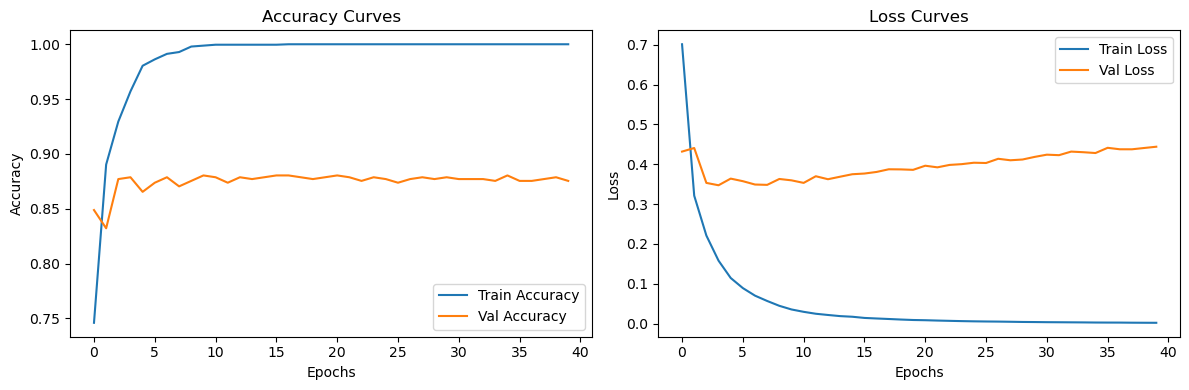

19/19 ━━━━━━━━━━━━━━━━━━━━ 120s 6s/step
Confusion Matrix:
 [[77  0  0  0  1 10]
 [ 0 90  2  2  1  0]
 [ 0  1 95 12  3  0]
 [ 0  2 21 81  1  0]
 [ 0  0  6  4 92  0]
 [ 7  1  0  0  1 92]]


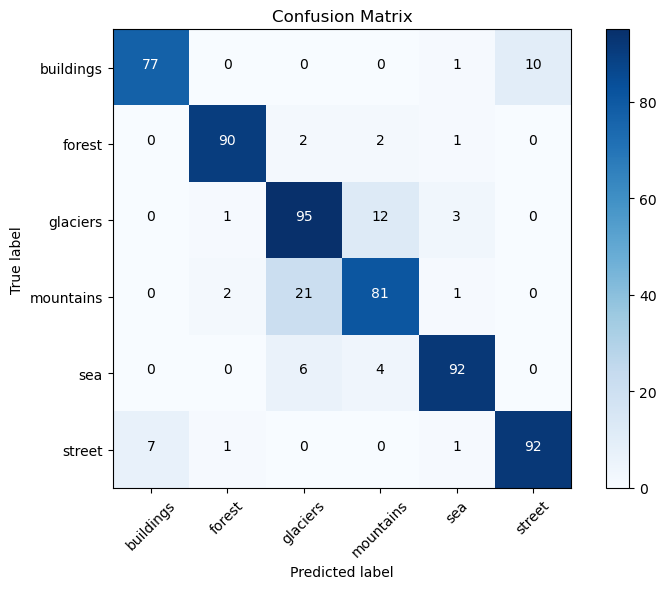

Classification Report:
               precision    recall  f1-score   support

   buildings       0.92      0.88      0.90        88
      forest       0.96      0.95      0.95        95
    glaciers       0.77      0.86      0.81       111
   mountains       0.82      0.77      0.79       105
         sea       0.93      0.90      0.92       102
      street       0.90      0.91      0.91       101

    accuracy                           0.88       602
   macro avg       0.88      0.88      0.88       602
weighted avg       0.88      0.88      0.88       602



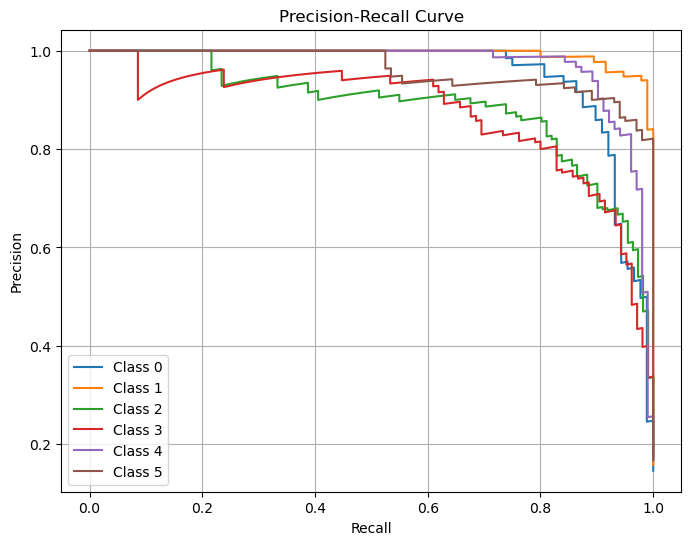

Confusion matrix and classification report saved to CSV.


In [33]:
run_test_harness()

In [34]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Define the model using VGG16
def define_model(num_classes):
    # Load the pre-trained VGG16 model without the top classifier layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the convolutional base initially
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)

    # Add custom classification head
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def plot_curves(history):
    # Plot accuracy and loss curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

def plot_confusion_matrix(cm, class_names):
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_pr_curve(y_true_one_hot, y_probs, num_classes):
    # Plot precision-recall curve
    from sklearn.metrics import precision_recall_curve
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import average_precision_score

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true_one_hot[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()



In [35]:
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',  # Multi-class classification
        shuffle=True
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',
        shuffle=False
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)  # Make sure this function is defined elsewhere

    # Get the layers for the VGG16 blocks
    base_model = model.layers[0]  # VGG16 base model
    blocks = [
        base_model.get_layer('block5_conv3'),  # 5th block
        base_model.get_layer('block4_conv3'),  # 4th block
        base_model.get_layer('block3_conv3'),  # 3rd block
        base_model.get_layer('block2_conv2'),  # 2nd block
        base_model.get_layer('block1_conv2')   # 1st block
    ]

    # Training loop: progressively unfreeze blocks
    for i in range(len(blocks)):
        # Unfreeze the current block and freeze previous blocks
        for layer in base_model.layers:
            layer.trainable = False
        for j in range(i, len(blocks)):
            blocks[j].trainable = True

        # Recompile the model after unfreezing layers
        model.compile(optimizer=Adam(learning_rate=0.0001), 
                      loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        print(f"Training with block {5 - i} unfrozen...")
        history = model.fit(
            train_it,
            validation_data=test_it,
            epochs=10
        )

        # Plot accuracy and loss curves for comparison
        plot_curves(history)

        # Evaluate model on test data
        test_steps = len(test_it)
        y_probs = model.predict(test_it, steps=test_steps, verbose=1)
        y_pred = np.argmax(y_probs, axis=1)
        y_true = test_it.classes

        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        print("Confusion Matrix:\n", cm)

        # Plot Confusion Matrix
        class_names = list(test_it.class_indices.keys())
        plot_confusion_matrix(cm, class_names)

        # Classification Report
        report = classification_report(y_true, y_pred, target_names=class_names)
        print("Classification Report:\n", report)

        # One-hot encode y_true
        y_true_one_hot = np.zeros((len(y_true), num_classes))
        y_true_one_hot[np.arange(len(y_true)), y_true] = 1

        # Precision-Recall Curves
        plot_pr_curve(y_true_one_hot, y_probs, num_classes)

        # Save Confusion Matrix to CSV
        cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
        cm_df.to_csv(f'confusion_matrix_block_{5 - i}.csv', index=True)

        # Save classification report
        report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
        report_df = pd.DataFrame(report_dict).transpose()
        report_df.to_csv(f'classification_report_block_{5 - i}.csv', index=True)

    print("Model training and evaluation complete.")



Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.
Training with block 5 unfrozen...
Epoch 1/10


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 1952s 26s/step - accuracy: 0.6441 - loss: 0.9165 - val_accuracy: 0.8754 - val_loss: 0.3534
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2117s 28s/step - accuracy: 0.8973 - loss: 0.2689 - val_accuracy: 0.8638 - val_loss: 0.3399
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2095s 28s/step - accuracy: 0.9605 - loss: 0.1150 - val_accuracy: 0.8738 - val_loss: 0.4170
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1629s 22s/step - accuracy: 0.9774 - loss: 0.0601 - val_accuracy: 0.9020 - val_loss: 0.3128
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1637s 22s/step - accuracy: 0.9952 - loss: 0.0191 - val_accuracy: 0.8738 - val_loss: 0.5460
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1644s 22s/step - accuracy: 0.9946 - loss: 0.0129 - val_accuracy: 0.8887 - val_loss: 0.3984
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1940s 26s/step - accuracy: 0.9912 - loss: 0.0259 - val_accuracy: 0.8621 - val_loss: 0.4515
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9434s 127s/step - accuracy: 0.9882 - loss: 0.0393 - val_accuracy: 0.84

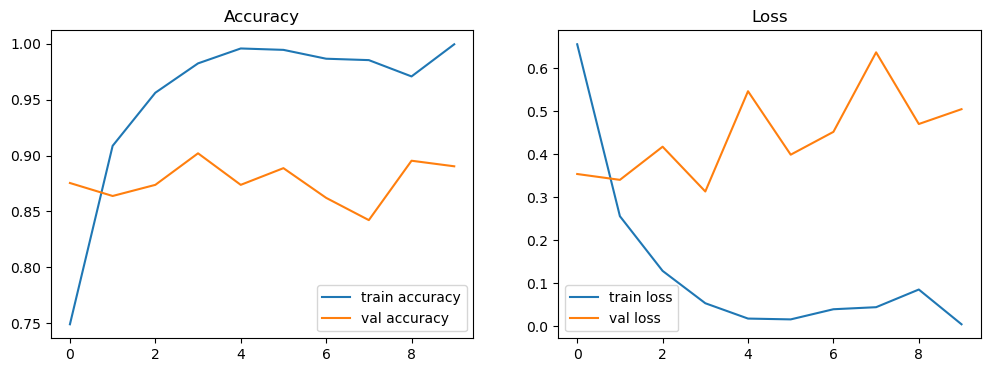

19/19 ━━━━━━━━━━━━━━━━━━━━ 125s 7s/step
Confusion Matrix:
 [[ 72   0   0   0   3  13]
 [  1  92   1   0   1   0]
 [  0   1 104   5   1   0]
 [  0   1  22  82   0   0]
 [  0   0   5   2  95   0]
 [  9   0   0   0   1  91]]


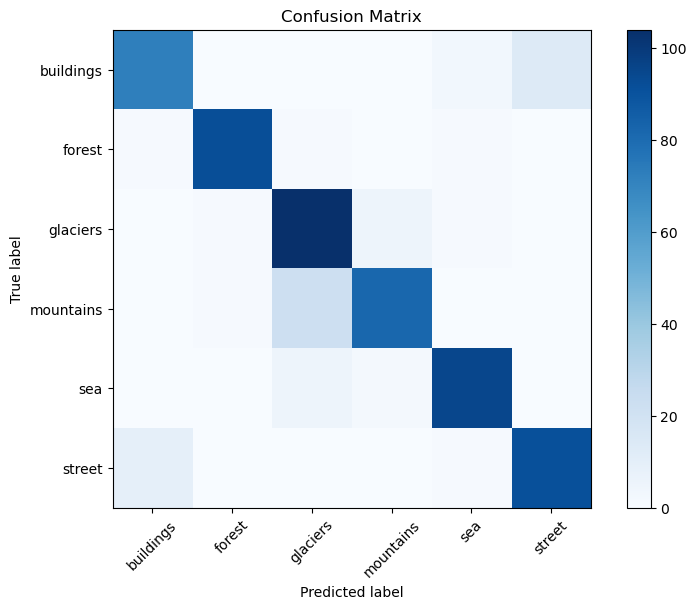

Classification Report:
               precision    recall  f1-score   support

   buildings       0.88      0.82      0.85        88
      forest       0.98      0.97      0.97        95
    glaciers       0.79      0.94      0.86       111
   mountains       0.92      0.78      0.85       105
         sea       0.94      0.93      0.94       102
      street       0.88      0.90      0.89       101

    accuracy                           0.89       602
   macro avg       0.90      0.89      0.89       602
weighted avg       0.89      0.89      0.89       602



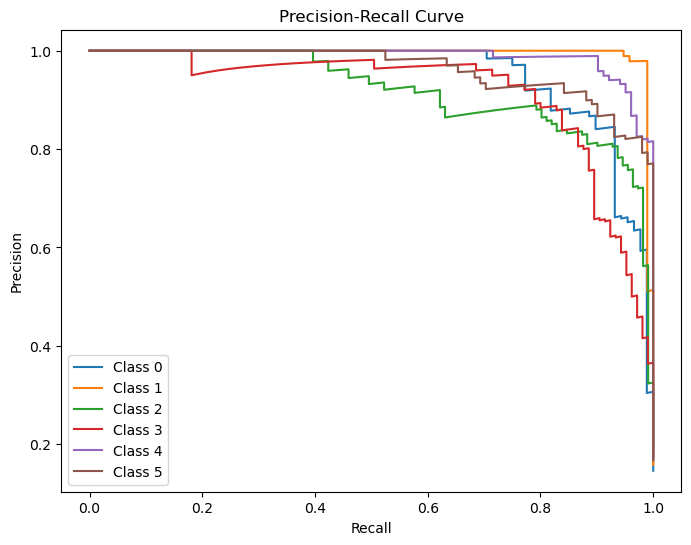

Training with block 4 unfrozen...
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1699s 23s/step - accuracy: 0.9914 - loss: 0.0230 - val_accuracy: 0.8787 - val_loss: 0.5784
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 43913s 593s/step - accuracy: 0.9839 - loss: 0.0465 - val_accuracy: 0.8854 - val_loss: 0.6009
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 34273s 463s/step - accuracy: 0.9861 - loss: 0.0449 - val_accuracy: 0.8904 - val_loss: 0.4936
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2059s 27s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8920 - val_loss: 0.5428
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2858s 38s/step - accuracy: 1.0000 - loss: 2.2331e-04 - val_accuracy: 0.8920 - val_loss: 0.5390
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2366s 31s/step - accuracy: 1.0000 - loss: 1.0195e-04 - val_accuracy: 0.8953 - val_loss: 0.5536
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 86959s 1175s/step - accuracy: 1.0000 - loss: 1.0398e-04 - val_accuracy: 0.8970 - val_loss: 0.5654
Epoch 8/10
31/75 ━━━━━━━━━━━━━━━━━━━━ 20:22 

KeyboardInterrupt: 

In [36]:
# Run the test harness
run_test_harness()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model using VGG16
def define_model(num_classes):
    # Load the pre-trained VGG16 model without the top classifier layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Unfreeze layers from block 3 onwards (block 3 corresponds to layers after the 3rd convolutional block)
    for layer in base_model.layers[:15]:  # Freeze first 15 layers (blocks 1, 2)
        layer.trainable = False
    for layer in base_model.layers[15:]:  # Unfreeze the rest (block 3 and onwards)
        layer.trainable = True

    # Build the model
    model = Sequential()
    model.add(base_model)

    # Add custom classification head with Dropout for regularization
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))  # Add Dropout to reduce overfitting
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',  # Multi-class classification
        shuffle=True
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',
        shuffle=False
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)  # Make sure this function is defined elsewhere

    # Train the model
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=10
    )

    # Plot accuracy and loss curves
    plot_curves(history)

    # Evaluate model on test data
    test_steps = len(test_it)
    y_probs = model.predict(test_it, steps=test_steps, verbose=1)
    y_pred = np.argmax(y_probs, axis=1)
    y_true = test_it.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # Plot Confusion Matrix
    class_names = list(test_it.class_indices.keys())
    plot_confusion_matrix(cm, class_names)

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("Classification Report:\n", report)

    # One-hot encode y_true
    y_true_one_hot = np.zeros((len(y_true), num_classes))
    y_true_one_hot[np.arange(len(y_true)), y_true] = 1

    # Precision-Recall Curves
    plot_pr_curve(y_true_one_hot, y_probs, num_classes)

    # Save Confusion Matrix to CSV
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    cm_df.to_csv('confusion_matrix.csv', index=True)

    # Save classification report
    report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df.to_csv('classification_report.csv', index=True)

    print("Confusion matrix and classification report saved to CSV.")


In [ ]:
run_test_harness()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model using VGG16
def define_model(num_classes):
    # Load the pre-trained VGG16 model without the top classifier layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Unfreeze layers from block 3 onwards (block 3 corresponds to layers after the 3rd convolutional block)
    for layer in base_model.layers[:15]:  # Freeze first 15 layers (blocks 1, 2)
        layer.trainable = False
    for layer in base_model.layers[15:]:  # Unfreeze the rest (block 3 and onwards)
        layer.trainable = True

    # Build the model
    model = Sequential()
    model.add(base_model)

    # Add custom classification head with Dropout for regularization
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))  # Add Dropout to reduce overfitting
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
run_test_harness()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_from_csv(file_path):
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Check if required columns exist
    required_columns = {"Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"}
    if not required_columns.issubset(data.columns):
        print(f"CSV file must contain the columns: {required_columns}")
        return

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(data['Epoch'], data['Train Accuracy'], label='Train Accuracy', marker='o')
    plt.plot(data['Epoch'], data['Val Accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(data['Epoch'], data['Train Loss'], label='Train Loss', marker='o')
    plt.plot(data['Epoch'], data['Val Loss'], label='Validation Loss', marker='o')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()

In [43]:
# Function to plot a heatmap of the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Run the test harness
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical'
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',
        shuffle=False  # Maintain order for evaluation
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)

    # Train the model
    model.fit(
        train_it,
        validation_data=test_it,
        epochs=10,  # Reduced for quick results
        verbose=1
    )

    # Predict on test data
    test_steps = len(test_it)  # Total batches in the test set
    y_pred_probs = model.predict(test_it, steps=test_steps, verbose=1)
    y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices
    y_true = test_it.classes  # True labels

    # Classification report
    class_labels = list(test_it.class_indices.keys())
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Plot confusion matrix
    print("\nConfusion Matrix Heatmap:")
    plot_confusion_matrix(y_true, y_pred, class_labels)
